# Importation des packages

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


# Importation des bases de données

In [ ]:
df=pd.read_csv('/content/df_comments_posts.csv',delimiter=",")

In [ ]:
df.head()

,post_id,subreddit,created_utc,post_title,link_flair_text,comment
0,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""https://x.com/AuthorJMac/status/1773871445669..."
1,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"> So, just to clarify. This post isn't about w..."
2,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,If AI could do/explain my taxes this would be ...
3,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""I agree, but AI won't prevent you from doing ..."
4,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""People are taking this quite literally, but I..."


In [ ]:
df['date']=df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))

# Description des données

In [ ]:
df.describe()

,created_utc,date
count,3.482950e+05,348295
mean,1.663468e+09,2022-09-18 02:34:30.346927104
min,1.400128e+09,2014-05-15 04:25:36
25%,1.615821e+09,2021-03-15 15:13:29
50%,1.680782e+09,2023-04-06 11:45:26
75%,1.717090e+09,2024-05-30 17:23:31
max,1.745336e+09,2025-04-22 15:25:59
std,6.643775e+07,NaN


In [ ]:
df.describe(include='object')

,post_id,subreddit,post_title,link_flair_text,comment
count,348295,348295,348295,315346,348295
unique,4867,5,4806,84,316853
top,re46xx,datascience,[Official] 2021 End of Year Salary Sharing thread,Discussion,[deleted]
freq,804,104690,804,144971,7583


In [ ]:
df['date'].describe()

,date
count,348295
mean,2022-09-18 02:34:30.346927104
min,2014-05-15 04:25:36
25%,2021-03-15 15:13:29
50%,2023-04-06 11:45:26
75%,2024-05-30 17:23:31
max,2025-04-22 15:25:59


Evolution du nombre de commentaire par année pour chaque subreddit dans un même graphe

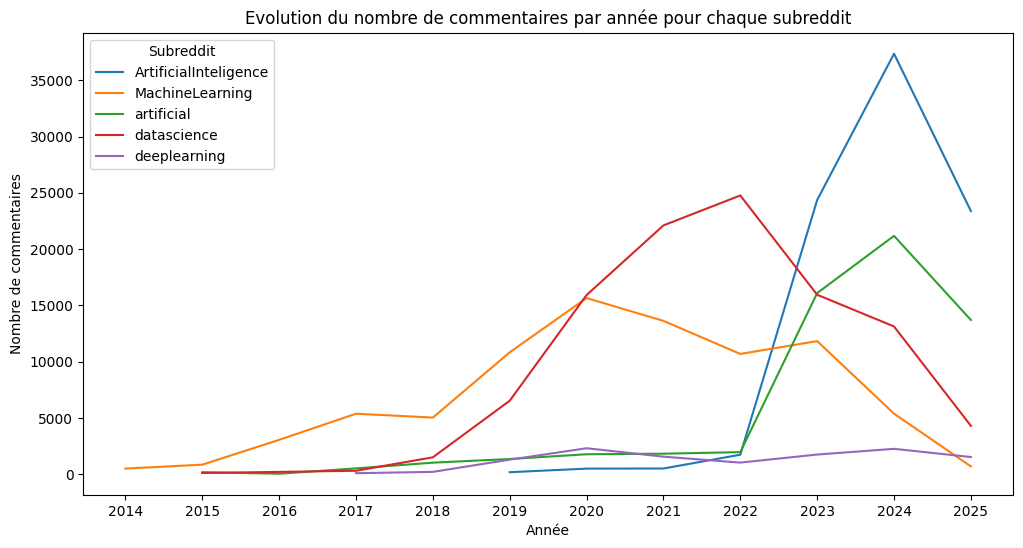

In [ ]:
# Evolution du nombre de commentaire par année pour chaque subreddit dans un même graphe

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects if not already done
# df['date'] = pd.to_datetime(df['date'])

# Extract year from the date
df['year'] = df['date'].dt.year

# Group by subreddit and year, then count the number of comments
comment_counts = df.groupby(['subreddit', 'year'])['post_id'].count().reset_index()
comment_counts.rename(columns={'post_id': 'comment_count'}, inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='comment_count', hue='subreddit', data=comment_counts)
plt.title('Evolution du nombre de commentaires par année pour chaque subreddit')
plt.xlabel('Année')
plt.ylabel('Nombre de commentaires')
plt.xticks(comment_counts['year'].unique()) # Ensure all years are displayed on x-axis
plt.legend(title='Subreddit')
plt.show()


Nombre de posts par thème

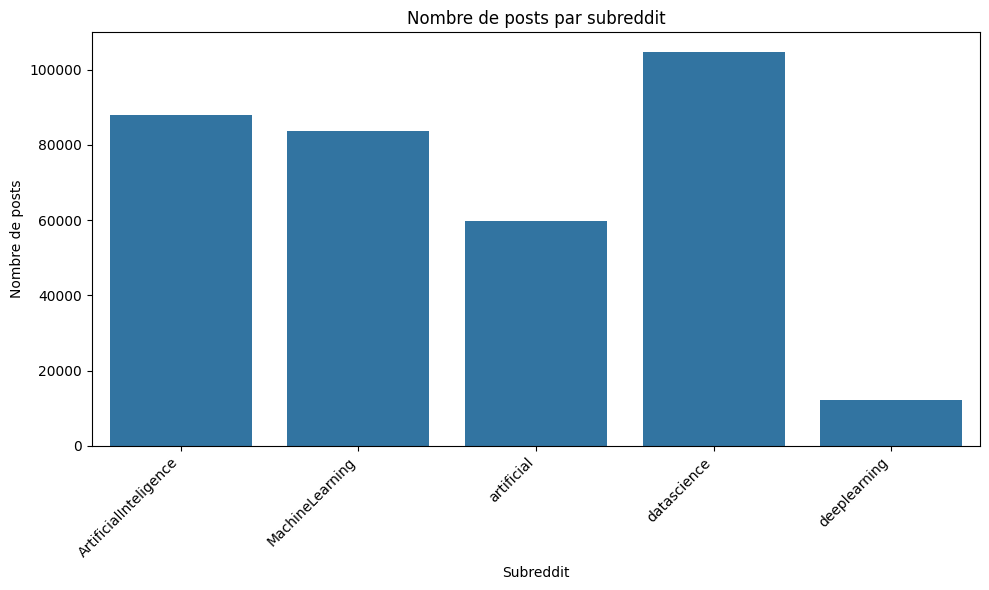

In [ ]:


# Group by subreddit and count the posts
subreddit_post_counts = df.groupby('subreddit')['post_id'].count().reset_index()
subreddit_post_counts.rename(columns={'post_id': 'post_count'}, inplace=True)


# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='subreddit', y='post_count', data=subreddit_post_counts)
plt.title('Nombre de posts par subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Nombre de posts')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Analyse des sentiments

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
# Analyse des sentiments pour les posts

df['sentiment'] = df['comment'].astype(str).apply(analyze_sentiment)

In [ ]:

# Analyse des sentiments pour les posts
df['post_sentiment'] = df['post_title'].astype(str).apply(analyze_sentiment)

In [ ]:

print(df[['comment', 'sentiment', 'post_title', 'post_sentiment']].head()) # Show first few rows

                                             comment  sentiment  \
0  "https://x.com/AuthorJMac/status/1773871445669...   0.000000   
1  > So, just to clarify. This post isn't about w...   0.000000   
2  If AI could do/explain my taxes this would be ...   0.800000   
3  "I agree, but AI won't prevent you from doing ...  -0.333333   
4  "People are taking this quite literally, but I...   0.091667   

                                          post_title  post_sentiment  
0  What are your thoughts on the following statem...             0.0  
1  What are your thoughts on the following statem...             0.0  
2  What are your thoughts on the following statem...             0.0  
3  What are your thoughts on the following statem...             0.0  
4  What are your thoughts on the following statem...             0.0  


In [ ]:
#
positive_comments = df[df['sentiment'] > 0]
negative_comments = df[df['sentiment'] < 0]

In [ ]:

print("\nNumber of positive comments:", len(positive_comments))
print("Number of negative comments:", len(negative_comments))



Number of positive comments: 156809
Number of negative comments: 54667


In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all positive comments into a single string
positive_text = " ".join(positive_comments['comment'].astype(str))


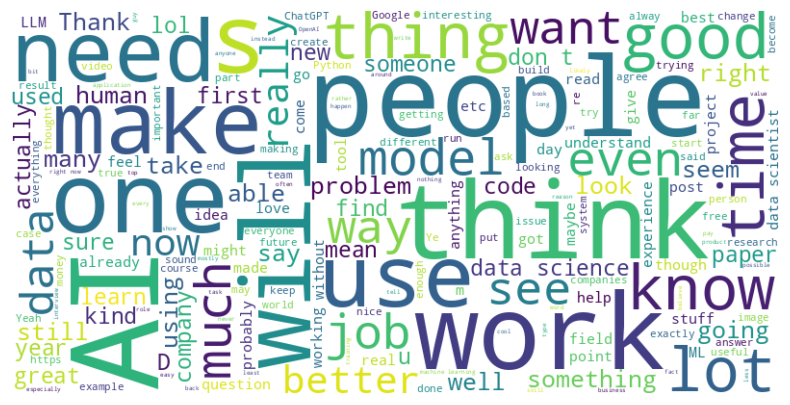

In [ ]:

wordcloud_pos = WordCloud(width=800, height=400, background_color="white", stopwords=None).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
negative_text = " ".join(negative_comments['comment'].astype(str))


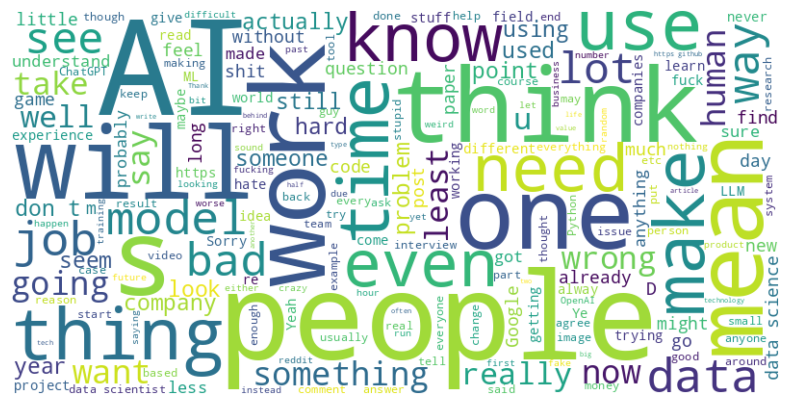

In [ ]:

wordcloud_neg = WordCloud(width=800, height=400, background_color="white", stopwords=None).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,post_id,subreddit,created_utc,post_title,link_flair_text,comment,date,year,sentiment,post_sentiment
0,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""https://x.com/AuthorJMac/status/1773871445669...",2024-06-02 17:29:13,2024,0.000000,0.0
1,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"> So, just to clarify. This post isn't about w...",2024-06-02 17:29:13,2024,0.000000,0.0
2,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,If AI could do/explain my taxes this would be ...,2024-06-02 17:29:13,2024,0.800000,0.0
3,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""I agree, but AI won't prevent you from doing ...",2024-06-02 17:29:13,2024,-0.333333,0.0
4,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""People are taking this quite literally, but I...",2024-06-02 17:29:13,2024,0.091667,0.0


In [ ]:
df['subreddit'].describe()

,subreddit
count,24179
unique,4
top,MachineLearning
freq,9732


La répartion des commentaires selon la nature des sentiments des commentateurs

In [ ]:

def repartition_subreddit(base, base_name):
    color = ['lightgreen', 'lightcoral','lightblue', "lightyellow"]
    subreddit_counts = base['subreddit'].value_counts()
    plt.figure(figsize=(10, 6))
    figur=subreddit_counts.plot(kind="pie", colors=color, shadow=True)
    plt.title(f'Repartition des commentaires par theme de la base {base_name}')
    plt.tight_layout()
    plt.show()
    return subreddit_counts, figur


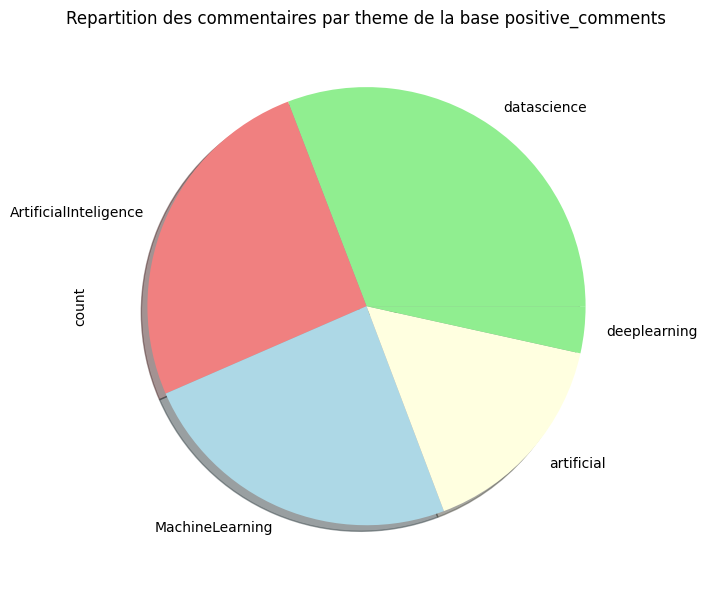

(subreddit
 datascience              48347
 ArtificialInteligence    40306
 MachineLearning          37970
 artificial               24767
 deeplearning              5419
 Name: count, dtype: int64,
 <Axes: title={'center': 'Repartition des commentaires par theme de la base positive_comments'}, ylabel='count'>)

In [ ]:
repartition_subreddit(positive_comments,"positive_comments")

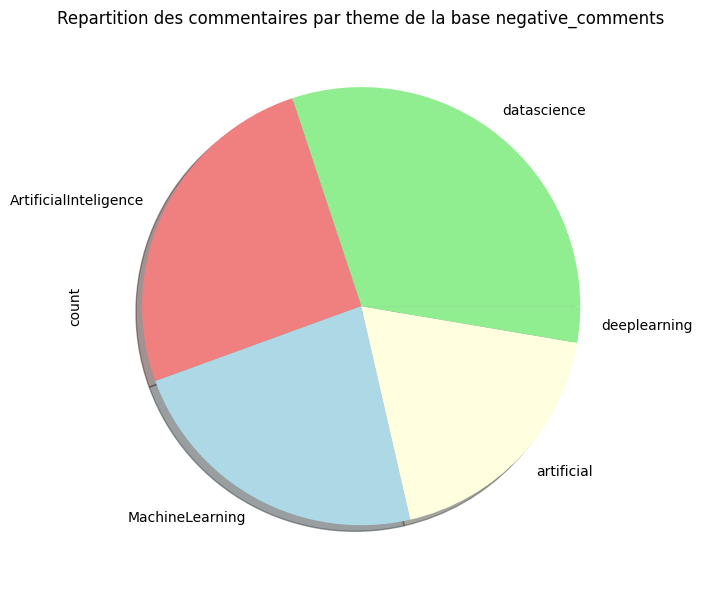

(subreddit
 datascience              16458
 ArtificialInteligence    13912
 MachineLearning          12597
 artificial               10239
 deeplearning              1461
 Name: count, dtype: int64,
 <Axes: title={'center': 'Repartition des commentaires par theme de la base negative_comments'}, ylabel='count'>)

In [ ]:
repartition_subreddit(negative_comments, "negative_comments")

In [ ]:

def categorie_sentiment(sentiment_score):
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

df['type_commentaire'] = df['sentiment'].apply(categorie_sentiment)


In [ ]:
type_commentaire_count=df['type_commentaire'].value_counts()

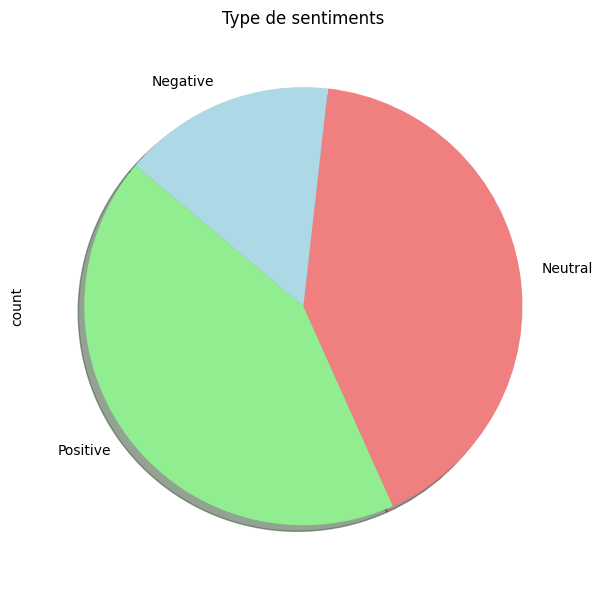

In [ ]:
colors = ['lightgreen', 'lightcoral','lightblue']

plt.figure(figsize=(10, 6))
figur=type_commentaire_count.plot(kind="pie", colors=colors, shadow=True, startangle=140)
plt.title('Type de sentiments')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()